In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
ls -alt ../*.xlsx

-rwxr-xr-x 1 ldhagen ldhagen 76203 Jun  9 16:22 '../fixed Texas COVID-19 Active Case Data by County.xlsx'*
-rw-r--r-- 1 ldhagen ldhagen 71145 Jun  9 16:05 '../Texas COVID-19 Fatality Count Data by County.xlsx'
-rw-r--r-- 1 ldhagen ldhagen 16562 Jun  9 16:00 '../Texas COVID-19 Hospitalizations by TSA.xlsx'
-rw-r--r-- 1 ldhagen ldhagen 81879 Jun  9 16:00 '../Cumulative Tests over Time by County.xlsx'
-rw-r--r-- 1 ldhagen ldhagen 75221 Jun  9 16:00 '../Texas COVID-19 Active Case Data by County.xlsx'
-rw-r--r-- 1 ldhagen ldhagen 85488 Jun  9 16:00 '../Texas COVID-19 Case Count Data by County.xlsx'


In [3]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Hospitalizations by TSA.xlsx", header=2)

In [4]:
a = df_Texas_Covid_case.set_index('TSA Name')

In [5]:
a.T['San Antonio'][1:].index[0]

Timestamp('2020-04-08 00:00:00')

In [6]:
count = 0
dated_dict = {}
for x in a.T['San Antonio'][1:]:
    print(a.T['San Antonio'][1:].index[count], x)
    dated_dict[a.T['San Antonio'][1:].index[count]] = x
    count += 1

2020-04-08 00:00:00 69
2020-04-09 00:00:00 62
2020-04-10 00:00:00 62
2020-04-11 00:00:00 62
2020-04-12 00:00:00 57
2020-04-13 00:00:00 57
2020-04-14 00:00:00 64
2020-04-15 00:00:00 65
2020-04-16 00:00:00 30
2020-04-17 00:00:00 47
2020-04-18 00:00:00 52
2020-04-19 00:00:00 46
2020-04-20 00:00:00 38
2020-04-21 00:00:00 45
2020-04-22 00:00:00 109
2020-04-23 00:00:00 80
2020-04-24 00:00:00 63
2020-04-25 00:00:00 53
2020-04-26 00:00:00 60
2020-04-27 00:00:00 59
2020-04-28 00:00:00 59
2020-04-29 00:00:00 58
2020-04-30 00:00:00 53
2020-05-01 00:00:00 54
2020-05-02 00:00:00 57
2020-05-03 00:00:00 61
2020-05-04 00:00:00 56
2020-05-05 00:00:00 67
2020-05-06 00:00:00 69
2020-05-07 00:00:00 56
2020-05-08 00:00:00 68
2020-05-09 00:00:00 71
2020-05-10 00:00:00 59
2020-05-11 00:00:00 53
2020-05-12 00:00:00 72
2020-05-13 00:00:00 71
2020-05-14 00:00:00 61
2020-05-15 00:00:00 65
2020-05-16 00:00:00 76
2020-05-17 00:00:00 82
2020-05-18 00:00:00 80
2020-05-19 00:00:00 84
2020-05-20 00:00:00 93
2020-05-21

In [7]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Hospitalized'])

In [8]:
c = dated_df.set_index('Date')

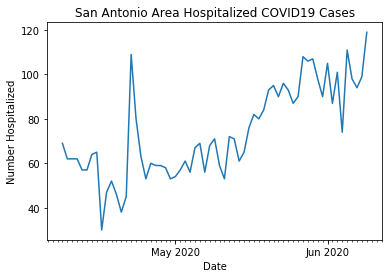

In [9]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Hospitalized',color='black')
plt.plot(c)
plt.title('San Antonio Area Hospitalized COVID19 Cases')
plt.savefig('San Antonio Hospitalized.png')

In [10]:
c

,Hospitalized
Date,
2020-04-08,69
2020-04-09,62
2020-04-10,62
2020-04-11,62
2020-04-12,57
...,...
2020-06-05,111
2020-06-06,98
2020-06-07,94
